In [ ]:
%pip install pymysql

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import os
import pymysql
import pandas as pd
import numpy as np

succeess = False

while not succeess:
  try:
    conn = pymysql.connect(
        host='db-aff.cpapv35x7rsh.us-east-2.rds.amazonaws.com',
        port=int(3306),
        user="admin",
        passwd="olist2021",
        db='olist',
        charset='utf8mb4')
    db = conn.cursor()
    succeess = True
  except:
    print("Wrong Password")

print("Connection Made")


def add_quotes(s):
  return '"'+str(s)+'",'

def add_quotes_nocomma(s):
  return '"'+str(s)+'"'

Connection Made


In [ ]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import torchtext
import re
import time
import matplotlib.pyplot as plt

### Retrieveing and formatting data.

In [ ]:
train_df = pd.read_sql_query("select * from olist.reviews", conn)

In [ ]:
train_df.head()

,review_id,order_id,score,title,message,created_date,answer_date
0,0001239bc1de2e33cb583967c2ca4c67,fc046d7776171871436844218f817d7d,5,nan,nan,2018-03-20,2018-03-20 18:36:04
1,0001cc6860aeaf5b9017fe4131a52e62,d4665434b01caa9dc3e3e78b3eb3593e,5,nan,nan,2018-06-22,2018-06-26 13:51:29
2,00020c7512a52e92212f12d3e37513c0,e28abf2eb2f1fbcbdc2dd0cd9a561671,5,Entrega rápida!,A entrega foi super rápida e o pendente é lind...,2018-04-25,2018-04-26 14:55:36
3,00032b0141443497c898b3093690af51,04fb47576993a3cb0c12d4b25eab6e4e,5,nan,nan,2017-05-30,2017-06-01 23:28:55
4,00034d88989f9a4c393bdcaec301537f,5f358d797a49fe2f24352f73426215f6,5,nan,nan,2017-08-12,2017-08-13 19:56:53


In [ ]:
reviews_df = train_df.dropna(subset=['message'])[['message', 'score']]

In [ ]:
reviews_df = reviews_df.reset_index(drop=True)

In [ ]:
reviews_df.drop_duplicates(subset=['message'], inplace=True)

In [ ]:
reviews_df['score'] = reviews_df['score'].apply(lambda x: "Negative" if x < 4 else "Positive")

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Cleaning text data.

In [ ]:
# #TODO Describe each and every regex pattern and operation. Also state how long did it take to finalize the 
# # text cleaning.
# def clean_text(text):
#     pattern = re.compile(r'\b[a-zA-Z]+\b')
#     output = ' '.join(pattern.findall(text)).lower()
#     output = re.sub(r'\b[a-z]\b', '', output)
#     output = re.sub(r'\s+', ' ', output).strip()
    
#     return output

In [ ]:
#TODO Describe each and every regex pattern and operation. Also state how long did it take to finalize the 
# text cleaning.
def clean_text(text):
    # Only keep words which contains alphabets only and no other special character or number
    pattern = re.compile(r'\b[a-zA-Z]+\b')
    
    # Perform above operation and then convert the review to lower case.
    output = ' '.join(pattern.findall(text)).lower()
    
    # Remove single alphabet words like a, and I.
    output = re.sub(r'\b[a-z]\b', '', output)
    
    # Remove extra space from the review text.
    output = re.sub(r'\s+', ' ', output).strip()
    
    # Remove stopword like the, me, he, she from the textual review.
    port_stopwords = stopwords.words('portuguese')
    
    output = ' '.join([word for word in output.split() if word not in port_stopwords])
    
    return output

In [ ]:
clean_df = pd.DataFrame({
    'label': reviews_df['score'],
    'clean_text': reviews_df['message'].apply(clean_text)
})

In [ ]:
clean_df.head()

,label,clean_text
0,Positive,nan
2,Positive,entrega super pendente lindo igual foto
7,Positive,gostei capinha celular veio esperava
8,Positive,otimo produto prazo cumprido sabor tambem bom
9,Positive,produto entregue antes esperado agilidade


#### Store the cleaned data, before preprocessing it.

In [ ]:
clean_df.to_pickle('clean_reviews.pkl')

## Word Clouds, Visualizing frequently occuring words 

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plotwordcloud(label):


    text = ' '.join((clean_df[clean_df['label'] == label]['clean_text']).values)
    
    plt.figure(figsize = (9,9)) ;
    wordcloud = WordCloud(min_font_size = 3,  max_words = 100 , width = 1200 , height = 800).generate(text)
    plt.imshow(wordcloud,interpolation = 'bilinear');

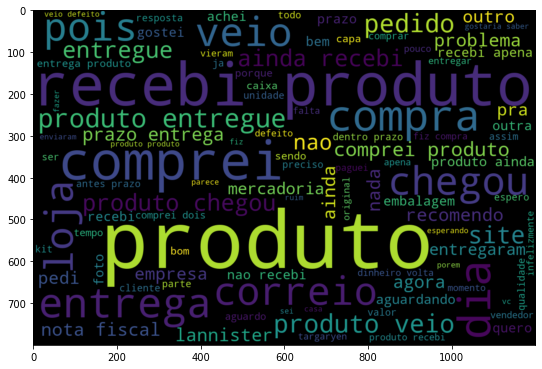

In [ ]:
plotwordcloud("Negative")

There are a lot of common most frequently occuring words, hence they are overlapping for each category.

### Getting top 30 common words for each category.

In [ ]:
from collections import Counter

un_labels = clean_df['label'].unique()
counter_dict = {}

for label in un_labels:
    df_here = clean_df[clean_df['label'] == label]
    combined_text_here = ' '.join(df_here['clean_text'].values)
    counter_dict[str(label)] = Counter([word for word in combined_text_here.split()]).most_common()[:30]

#### Getting commonly occuring words in each category (words which are common in more than 2 categories).

In [ ]:
combined_words = []
for label in un_labels:
    [combined_words.append(word) for word, count in counter_dict[str(label)]]

common_words = [word for word, count in list(Counter(combined_words).items()) if count > 1]

In [ ]:
common_words

['produto',
 'prazo',
 'entrega',
 'chegou',
 'qualidade',
 'entregue',
 'loja',
 'recebi',
 'veio',
 'compra',
 'lannister',
 'ainda']

#### Creating a new top words dictionary where words are not common to each category.

In [ ]:
un_top_dict = {}
for label in un_labels:
    un_top_dict[str(label)] = [(word, count) for word, count in counter_dict[str(label)] if word not in common_words]

In [ ]:
un_top_dict

{'Negative': [('comprei', 2138),
  ('nao', 1086),
  ('pedido', 922),
  ('dia', 890),
  ('agora', 750),
  ('apenas', 671),
  ('pois', 654),
  ('produtos', 651),
  ('site', 604),
  ('dois', 584),
  ('nada', 561),
  ('quero', 544),
  ('ser', 522),
  ('outro', 513),
  ('contato', 512),
  ('pra', 511),
  ('dias', 501),
  ('aguardando', 499)],
 'Positive': [('antes', 5057),
  ('recomendo', 3469),
  ('bom', 3012),
  ('bem', 2665),
  ('tudo', 1843),
  ('super', 1554),
  ('excelente', 1488),
  ('gostei', 1316),
  ('dentro', 1141),
  ('boa', 907),
  ('perfeito', 850),
  ('sempre', 787),
  ('previsto', 766),
  ('embalado', 711),
  ('conforme', 711),
  ('comprar', 700),
  ('adorei', 698),
  ('certo', 682)]}

## Most frequently occuring words for the 'Negative' Sentiment.

<BarContainer object of 18 artists>

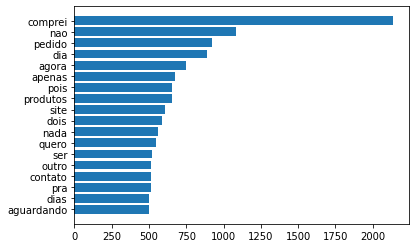

In [ ]:
plt.barh(y=np.array(un_top_dict['Negative'])[:, 0][::-1], width=np.array(un_top_dict['Negative'])[:, 1][::-1].astype(np.float))

## Most frequently occuring words for the 'Positive' sentiment.

<BarContainer object of 10 artists>

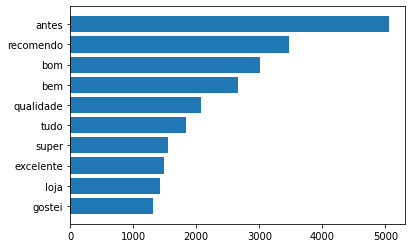

In [ ]:
plt.barh(y=np.array(un_top_dict['Positive'])[:, 0][::-1], width=np.array(un_top_dict['Positive'])[:, 1][::-1].astype(np.float))

## Preprocessing the text data.
#### Using Stemming and/or Lemmatization.

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import concurrent.futures
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
    stemmer = LancasterStemmer()
#     lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    pp_list = []
    for word in words:
          pp_list.append(word)
          pp_list.append(stemmer.stem(word))
#             pp_list.append(lemmatizer.lemmatize(word))
            
    
    pp_text = ' '.join(pp_list)
    return pp_text

In [ ]:
import multiprocessing

n_parallel = multiprocessing.cpu_count() # Number of parallel processes
data_range = int(clean_df.shape[0] / n_parallel)
def parallel_pp_text(index):
    start = index*data_range
    end = (index+1)*data_range-1
    pp_text_df = clean_df.loc[start:end, 'clean_text'].apply(preprocess_text)
    
    return pp_text_df

In [ ]:
clean_df['pp_text'] = clean_df['clean_text'].apply(preprocess_text)

In [ ]:
clean_df.to_pickle('idmp_reviews_preprocessed_data.pkl')

## Building Machine Learning Models

### Using SKlearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
n_unq_words = 4347

In [ ]:
x_train_text, x_valid_text, y_train, y_valid = train_test_split(clean_df['pp_text'], clean_df['label'].values,test_size=0.2,
                                                     random_state=9)

In [ ]:
tfidf = TfidfVectorizer(max_features=n_unq_words, min_df=2)
tfidf.fit(clean_df['pp_text'])

TfidfVectorizer(max_features=4347, min_df=2)

In [ ]:
x_train1 = tfidf.transform(x_train_text)
x_test1 = tfidf.transform(x_valid_text)

In [ ]:
x_train_arr1 = x_train1.toarray()
x_test_arr1 = x_test1.toarray()

In [ ]:
x_train_arr1.shape

(28928, 4347)

### Using Tensorflow and Keras for tokenization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
clean_df['text_len'] = clean_df['clean_text'].apply(lambda x: len(x.split()))

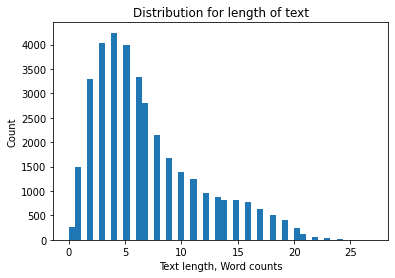

In [ ]:
plt.hist(clean_df['text_len'].values, bins=50)
plt.title("Distribution for length of text")
plt.xlabel("Text length, Word counts")
plt.ylabel("Count")
plt.show()

Selecting max text length to be 35 after refering to the histogram.

In [ ]:
vocab_size = n_unq_words
max_len = 35
tokenizer = Tokenizer(num_words=vocab_size)

In [ ]:
x = clean_df['clean_text']
y = LabelBinarizer().fit_transform(clean_df['label'].values)
x_train_text, x_valid_text, y_train, y_valid = train_test_split(x.values, y,test_size=0.2,
                                                     random_state=9)

In [ ]:
tokenizer.fit_on_texts(x.values)

In [ ]:
x_train = tokenizer.texts_to_sequences(x_train_text)
x_valid = tokenizer.texts_to_sequences(x_valid_text)

In [ ]:
x_train = pad_sequences(x_train, maxlen=35)
x_valid = pad_sequences(x_valid, maxlen=35)

In [ ]:
x_train.shape

(28928, 35)

## Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = {}
logreg_scores = {}

In [ ]:
logreg['tokenizer'] = LogisticRegression().fit(x_train, y_train)
logreg_scores['test_tokenizer'] = logreg['tokenizer'].score(x_valid, y_valid)
logreg_scores['train_tokenizer'] = logreg['tokenizer'].score(x_train, y_train)

In [ ]:
logreg['tfidf'] = LogisticRegression().fit(x_train_arr1, y_train)
logreg_scores['test_tfidf'] = logreg['tfidf'].score(x_test_arr1, y_valid)
logreg_scores['train_tfidf'] = logreg['tfidf'].score(x_train_arr1, y_train)

In [ ]:
print("Train score with tokenizer :- ", logreg_scores['train_tokenizer'])
print("Test score with tokenizer :- ", logreg_scores['test_tokenizer'])
print("Train score with tfidf :- ", logreg_scores['train_tfidf'])
print("Test score with tfidf :- ", logreg_scores['test_tfidf'])

Train score with tokenizer :-  0.6781664823008849
Test score with tokenizer :-  0.6785121681415929
Train score with tfidf :-  0.8901756084070797
Test score with tfidf :-  0.8810840707964602


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranfor = {}
ranfor_scores = {}

In [ ]:
ranfor['tokenizer'] = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
ranfor_scores['test_tokenizer'] = ranfor['tokenizer'].score(x_valid, y_valid)
ranfor_scores['train_tokenizer'] = ranfor['tokenizer'].score(x_train, y_train)

In [ ]:
ranfor['tfidf'] = RandomForestClassifier(n_estimators=50).fit(x_train_arr1, y_train)
time.sleep(5)
ranfor_scores['test_tfidf'] = ranfor['tfidf'].score(x_test_arr1, y_valid)
ranfor_scores['train_tfidf'] = ranfor['tfidf'].score(x_train_arr1, y_train)

In [ ]:
print("Train score with tokenizer :- ", ranfor_scores['train_tokenizer'])
print("Test score with tokenizer :- ", ranfor_scores['test_tokenizer'])
print("Train score with tfidf :- ", ranfor_scores['train_tfidf'])
print("Test score with tfidf :- ", ranfor_scores['test_tfidf'])

Train score with tokenizer :-  0.9889034845132744
Test score with tokenizer :-  0.7746128318584071
Train score with tfidf :-  0.9858268805309734
Test score with tfidf :-  0.8676714601769911


In [ ]:
RandomForestClassifier().fit(x_train_arr1, y_train)

RandomForestClassifier()

## Using Deep Learning

In [ ]:
v_model = {}

In [ ]:
v_model['tfidf'] = Sequential([
    Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(vocab_size,)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

lr = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=1e4, decay_rate=0.92)
v_model['tfidf'].compile(optimizer=Adam(learning_rate=lr), metrics=['accuracy'], 
                         loss='binary_crossentropy')

v_model['tfidf'].summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               2226176   
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_14 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 64)                32832     
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_15 (Bat  (None, 64)               256       
 chNormalization)                                     

In [ ]:
v_model['tfidf'].fit(x_train_arr1, y_train, batch_size=256, epochs=10, validation_data=(x_test_arr1, y_valid))

Epoch 1/10
113/113 [==============================] - 9s 75ms/step - loss: 0.4636 - accuracy: 0.8315 - val_loss: 0.6789 - val_accuracy: 0.6222
Epoch 2/10
113/113 [==============================] - 8s 68ms/step - loss: 0.3616 - accuracy: 0.8729 - val_loss: 0.6686 - val_accuracy: 0.6222
Epoch 3/10
113/113 [==============================] - 8s 67ms/step - loss: 0.3181 - accuracy: 0.8896 - val_loss: 0.6405 - val_accuracy: 0.7259
Epoch 4/10
113/113 [==============================] - 8s 67ms/step - loss: 0.2885 - accuracy: 0.9028 - val_loss: 0.4103 - val_accuracy: 0.8692
Epoch 5/10
113/113 [==============================] - 8s 67ms/step - loss: 0.2499 - accuracy: 0.9168 - val_loss: 0.3638 - val_accuracy: 0.8601
Epoch 6/10
113/113 [==============================] - 8s 67ms/step - loss: 0.2251 - accuracy: 0.9269 - val_loss: 0.3840 - val_accuracy: 0.8562
Epoch 7/10
113/113 [==============================] - 7s 66ms/step - loss: 0.2109 - accuracy: 0.9327 - val_loss: 0.4031 - val_accuracy: 0.8608

In [ ]:
vocab_size

4347

In [ ]:
embed_size = 128
v_model['tokenizer'] = Sequential([
    Embedding(vocab_size, embed_size, input_length=max_len),
    GlobalMaxPooling1D(),
    Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

lr = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=1e4, decay_rate=0.90)
v_model['tokenizer'].compile(optimizer=Adam(learning_rate=lr), metrics=['accuracy'], 
                         loss='binary_crossentropy')

v_model['tokenizer'].summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 35, 128)           556416    
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_32 (Dense)            (None, 512)               66048     
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_21 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 128)             

In [ ]:
v_model['tokenizer'].fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
113/113 [==============================] - 5s 33ms/step - loss: 0.6658 - accuracy: 0.7997 - val_loss: 0.6635 - val_accuracy: 0.6222
Epoch 2/10
113/113 [==============================] - 4s 31ms/step - loss: 0.3412 - accuracy: 0.8767 - val_loss: 0.6646 - val_accuracy: 0.6222
Epoch 3/10
113/113 [==============================] - 4s 32ms/step - loss: 0.2859 - accuracy: 0.8983 - val_loss: 0.6370 - val_accuracy: 0.6222
Epoch 4/10
113/113 [==============================] - 3s 30ms/step - loss: 0.2485 - accuracy: 0.9108 - val_loss: 0.5488 - val_accuracy: 0.6224
Epoch 5/10
113/113 [==============================] - 3s 30ms/step - loss: 0.2233 - accuracy: 0.9251 - val_loss: 0.3747 - val_accuracy: 0.8473
Epoch 6/10
113/113 [==============================] - 3s 31ms/step - loss: 0.2017 - accuracy: 0.9338 - val_loss: 0.4293 - val_accuracy: 0.8277
Epoch 7/10
113/113 [==============================] - 3s 31ms/step - loss: 0.1829 - accuracy: 0.9420 - val_loss: 0.3884 - val_accuracy: 0.8464